In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *

you start at 0,0 (x,y) # checked this

at every round, you randomly walk up, down, left, or right one step # for one step

repeat this until you are 200 steps on either the x or y-axis away from 0,0 #

create such a random walk # preliminary solution visualization, code structure

(-200.0, 200.0)

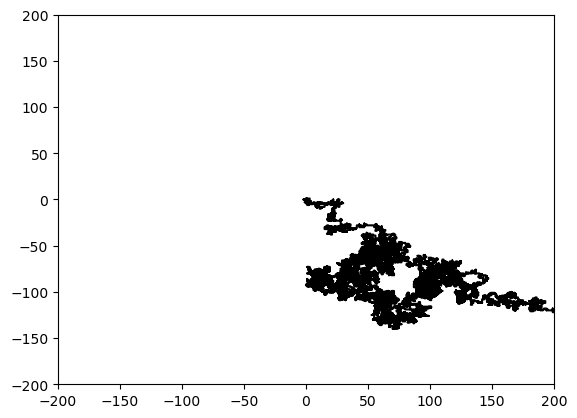

In [56]:
def randomWalk():
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    x=0
    y=0
    pathX=list()
    pathX.append(x)
    pathY=list()
    pathY.append(y)
    actions=list()
    while abs(x)<200 and abs(y)<200:
        direction=numpy.random.choice([0,1,2,3])
        actions.append(direction)
        x=x+xm[direction]
        y=y+ym[direction]
    
        pathX.append(x)
        pathY.append(y)
        
    
    return pathX,pathY,actions

X,Y,A=randomWalk()
#print(X,Y)

plot(X,Y,'-k')
xlim(-200,200)
ylim(-200,200)

0 3
1 204
2 159
3 4
[0.00810811 0.55135135 0.42972973 0.01081081]


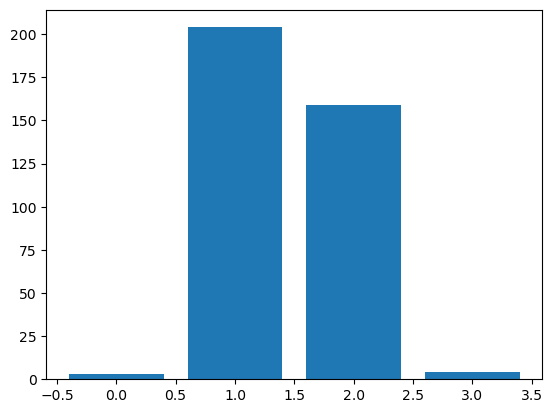

In [70]:
P=[]
for i in range(4):
    print(i,A.count(i))
    P.append(A.count(i))
bar(range(4),P)
P=numpy.array(P)
P=P/P.sum()
print(P)
policy=numpy.array([0.25,0.25,0.25,0.25])

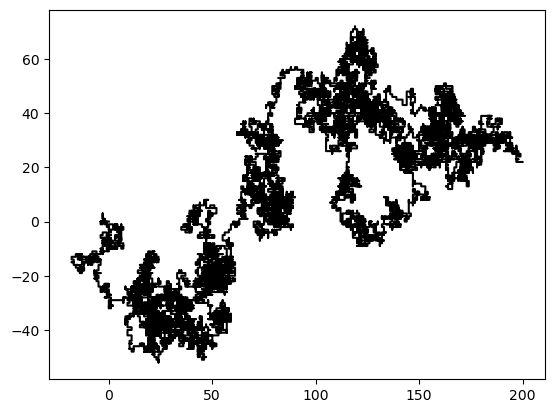

In [67]:
def randomWalk(policy):
    xm=[0,1,0,-1]
    ym=[-1,0,1,0]
    x=0
    y=0
    pathX=list()
    pathX.append(x)
    pathY=list()
    pathY.append(y)
    actions=list()
    while abs(x)<200 and abs(y)<200:
        direction=numpy.random.choice([0,1,2,3],p=policy)
        actions.append(direction)
        x=x+xm[direction]
        y=y+ym[direction]
    
        pathX.append(x)
        pathY.append(y)
        
    
    return pathX,pathY,actions

policy=numpy.array([0.25,0.25,0.25,0.25])
X,Y,A=randomWalk(policy)
plot(X,Y,'k')

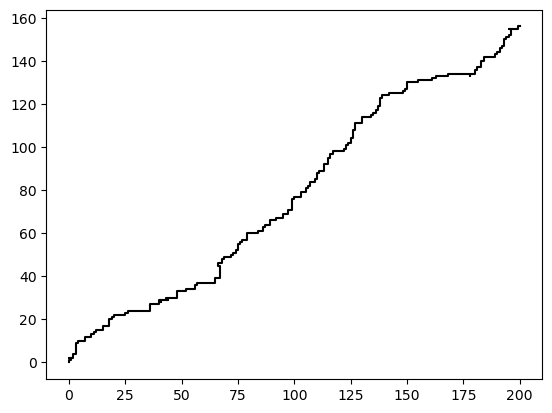

In [69]:
policy=numpy.array([0.01,0.49,0.49,0.01])
X,Y,A=randomWalk(policy)
plot(X,Y,'k')

[1. 0. 0. 0.]


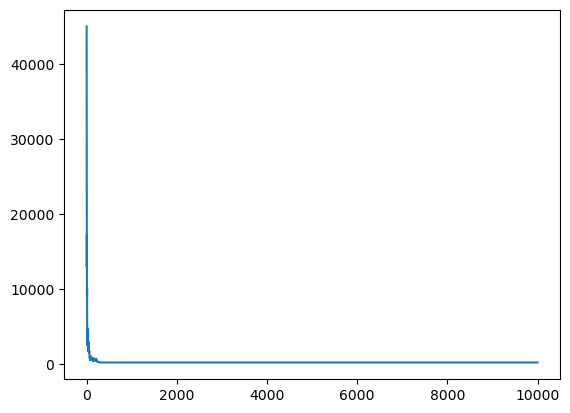

In [77]:
policy=numpy.array([0.25,0.25,0.25,0.25])
L=[]
for i in range(10000):
    X,Y,A=randomWalk(policy)
    P=[]
    for i in range(4):
        P.append(A.count(i))
    P=numpy.array(P)
    P=P/P.sum()
    #print(P)
    policy=P
    L.append(len(A))
plot(L)
print(policy)

[0.09275379 0.09275564 0.72247474 0.09201583]


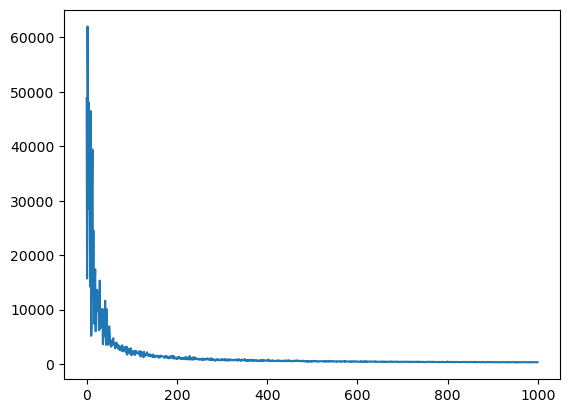

In [97]:
policy=numpy.array([0.25,0.25,0.25,0.25])
L=[]
learningRate=0.001
for i in range(1000):
    X,Y,A=randomWalk(policy)
    P=[]
    for i in range(4):
        P.append(A.count(i))
    bestAction=P.index(max(P))
    
    policy[bestAction]+=learningRate
    policy=policy/policy.sum()
    L.append(len(A))
plot(L)
print(policy)

In [90]:
policy/policy.sum()

array([0.24752475, 0.24752475, 0.24752475, 0.25742574])

In [84]:
max(L)

5